# Chapter 2. End-to-End Machine Learning Project

In this chapter you will work through an example project end to end,
pretending to be a recently hired data scientist at a real estate company. Here
are the main steps you will go through:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.


## Working with Real Data

When you are learning about Machine Learning, it is best to experiment with
real-world data, not artificial datasets. Fortunately, there are thousands of
open datasets to choose from, ranging across all sorts of domains. Here are a
few places you can look to get data:

When we are learning about ML, it's best to work with real data sets, not artificial ones. We list the following data sources:

- Popular open data reposatories
    - [UC Irvine ML repo](https://archive.ics.uci.edu/ml/index.php)
    - [Kaggle Datasets](https://www.kaggle.com/datasets)
    - [Amazon AWS Datasets](https://registry.opendata.aws/)
- Meta Portals: they list open data reposatories
    - [Data Portals](http://dataportals.org/)
    - [OpenDataMonitor](https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex)
    - [Quandl](https://www.quandl.com/)
- Other pages listing many open data reposatories
    - [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)
    - [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
    - [The Datasets Subreddit](https://www.reddit.com/r/datasets)

In this chapter we’ll use the California Housing Prices dataset from the
StatLib repository. This dataset is based on data from the
1990 California census. It is not exactly recent (a nice house in the Bay Area
was still affordable at the time), but it has many qualities for learning, so we
will pretend it is recent data. For teaching purposes I’ve added a categorical
attribute and removed a few features.

## 1. Look at the big picture

Our first task is to use the california census data to build a model of the housing prices in the state. This data includes features such as:
- Population
- Median Income
- Median housing price for each block group in California

A block group is the smallest geographical unit for which cencus data is published. A Block group has a population between 600 to 3,000. We will call them "districts" for short.
    
Our model should be able to predict the median housing price for any district, given the other features.

### Framing the Problem:
- The task is to build a model of housing prices in California using census data.
- The model should predict the median housing price in any district based on various metrics.
- The predicted prices will be used in a downstream Machine Learning system for real estate investments.

Pipelines:
- Data processing components in a data pipeline are used to manipulate and transform the data.
- Components run asynchronously, processing data and passing the results to the next component.
- The architecture is robust but requires proper monitoring to avoid performance issues.

Current Solution:
- The current solution involves manual estimation of district housing prices by experts.
- Estimates are often inaccurate, with deviations of more than 20% from the actual prices.
- Building a model to predict median housing prices using census data is seen as a cost-effective and accurate alternative.

Designing the System:
- The problem is framed as a supervised multiple regression task.
- The goal is to predict the median housing price using multiple features of the district.
- Batch learning is suitable as the data is small enough to fit in memory.

### Select a Performance Measure:
- The Root Mean Square Error (RMSE) is a typical performance measure for regression tasks.
- RMSE quantifies the average prediction error, giving more weight to larger errors.
- Mean Absolute Error (MAE) can also be considered in the presence of outliers.

### Check the Assumptions:
- Assumptions need to be verified to ensure the system aligns with downstream requirements.
- In this case, it is confirmed that the downstream system needs actual prices, not categories.
- It is crucial to verify assumptions early on to avoid wasting time on the wrong approach.

Overall, the task involves building a model to predict housing prices in California using census data. The model will be integrated into a data pipeline for real estate investments. The current manual estimation process is costly and inaccurate, leading to the need for a more efficient and accurate solution. The system will be designed as a supervised multiple regression task using batch learning techniques. Performance will be evaluated using the RMSE measure. Assumptions about the downstream system's requirements have been verified to ensure the system's alignment with expectations.


## 2. Get the Data

### Download the Data

In [1]:
# Setup
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import os
import tarfile
import urllib.request

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [6]:
#Function to fetch data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
fetch_housing_data()


In [8]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
# Data structure look
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


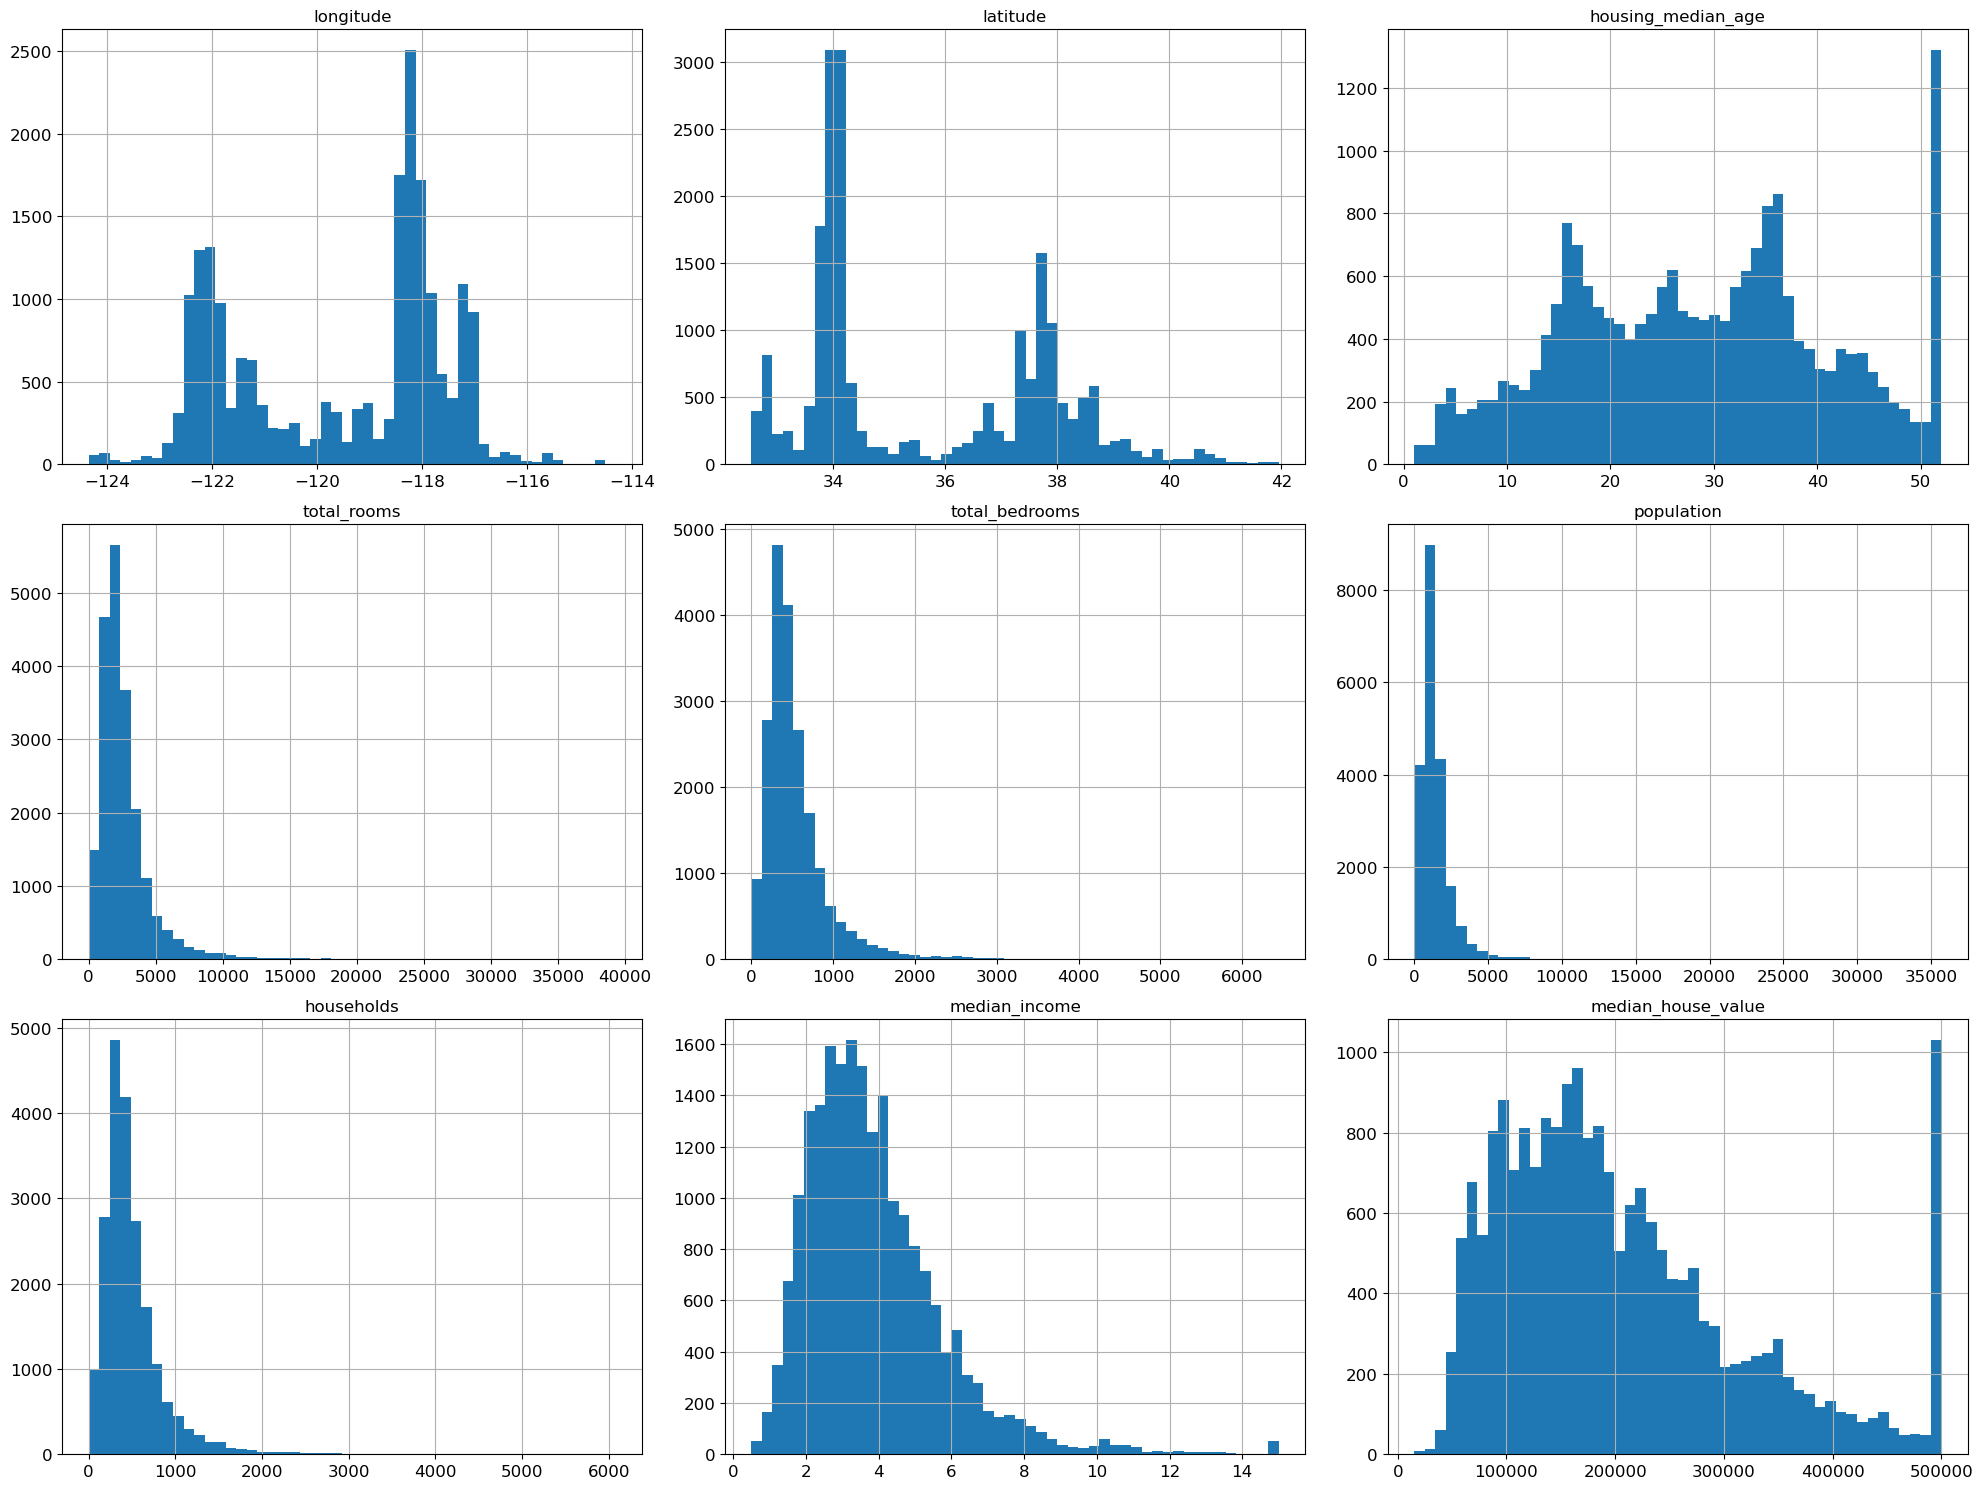

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

In [14]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [15]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [17]:
len(test_set)


4128

In [18]:
# Test set check

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [21]:
test_set.head()


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [23]:
test_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [26]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

In [28]:
housing["income_cat"].value_counts()


income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

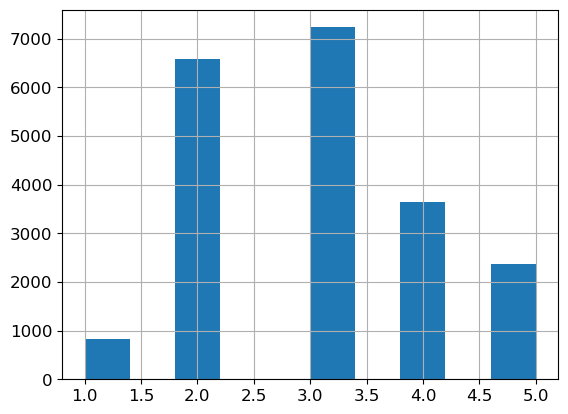

In [29]:
housing["income_cat"].hist()

<Axes: >

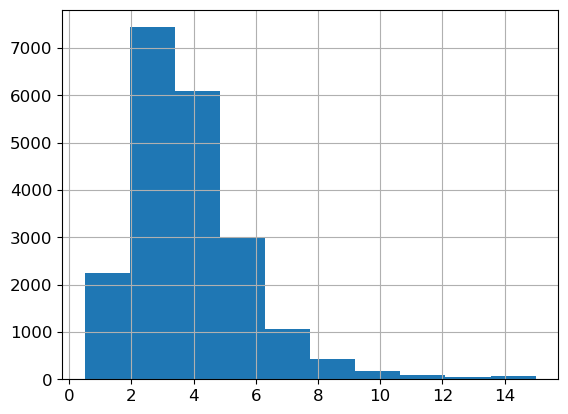

In [30]:
housing["median_income"].hist()


In [33]:
# Now you are ready to do stratified sampling based on the income category. 
# For this you can use Scikit-Learn’s StratifiedShuffleSplit class:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [34]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [35]:
housing["income_cat"].value_counts() / len(housing)


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [36]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [39]:
# Measure and compare the income category proportions in the full dataset

compare_props


,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [41]:
# Remove the income_cat attribute so the data is back to its original state:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [42]:
housing = strat_train_set.copy()

#### Visualizing Geographical Data

Since there is geographical information (latitude and longitude), it is a good
idea to create a scatterplot of all districts to visualize the data

Saving figure bad_visualization_plot


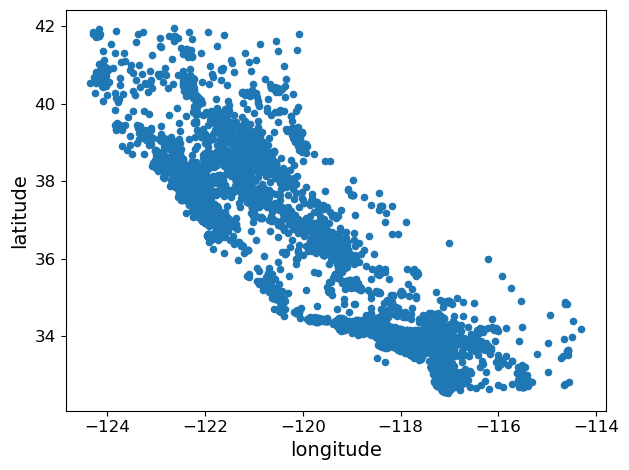

In [43]:

housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

This looks like California all right, but other than that it is hard to see any
particular pattern. Setting the alpha option to 0.1 makes it much easier to
visualize the places where there is a high density of data points

Saving figure better_visualization_plot


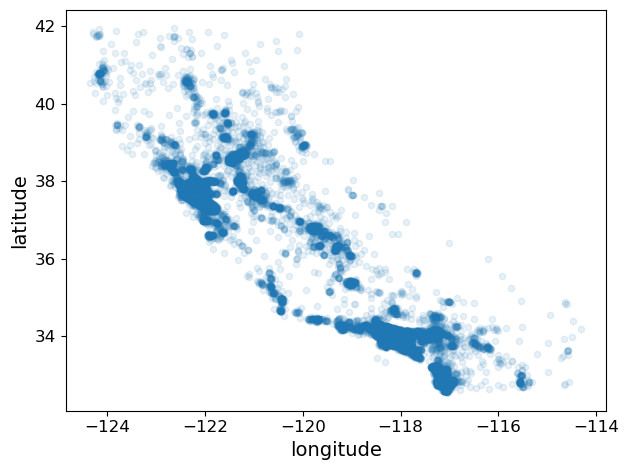

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Now that’s much better: you can clearly see the high-density areas, namely
the Bay Area and around Los Angeles and San Diego, plus a long line of fairly
high density in the Central Valley, in particular around Sacramento and
Fresno.
Our brains are very good at spotting patterns in pictures, but you may need to
play around with visualization parameters to make the patterns stand out.

Now let’s look at the housing prices . The radius of each circle
represents the district’s population (option s), and the color represents the
price (option c). We will use a predefined color map (option cmap) called jet,
which ranges from blue (low values) to red (high prices):

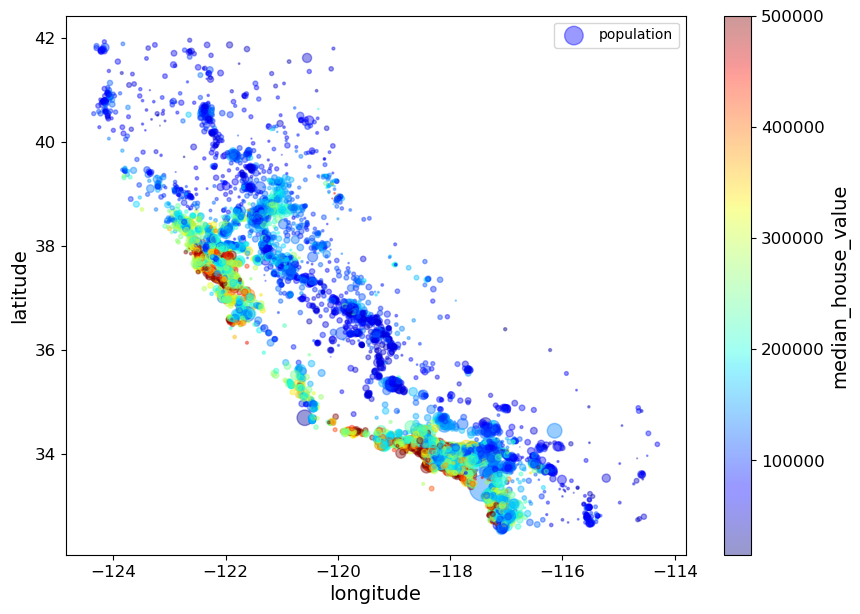

In [45]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This image tells you that the housing prices are very much related to the
location (e.g., close to the ocean) and to the population density, as you
probably knew already. A clustering algorithm should be useful for detecting
the main cluster and for adding new features that measure the proximity to the
cluster centers. The ocean proximity attribute may be useful as well, although
in Northern California the housing prices in coastal districts are not too high,
so it is not a simple rule

In [46]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x180d60ac0>)

Saving figure california_housing_prices_plot


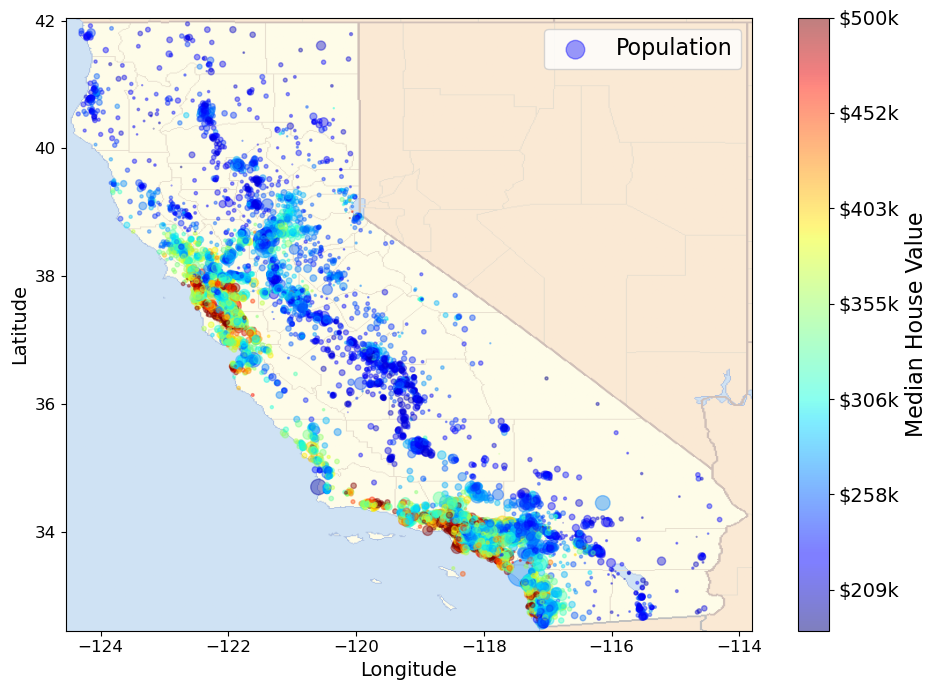

In [47]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()
